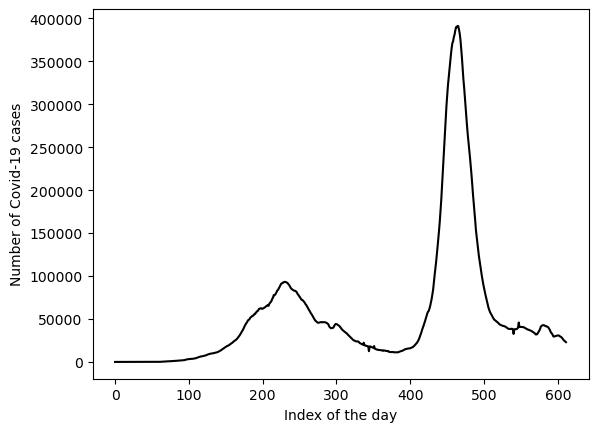

0.9990644144715021


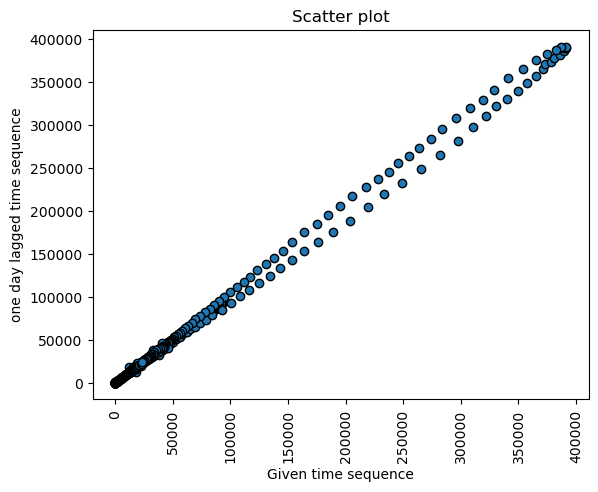

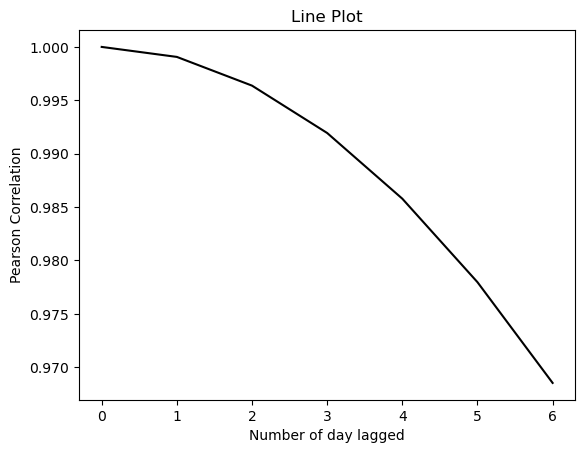

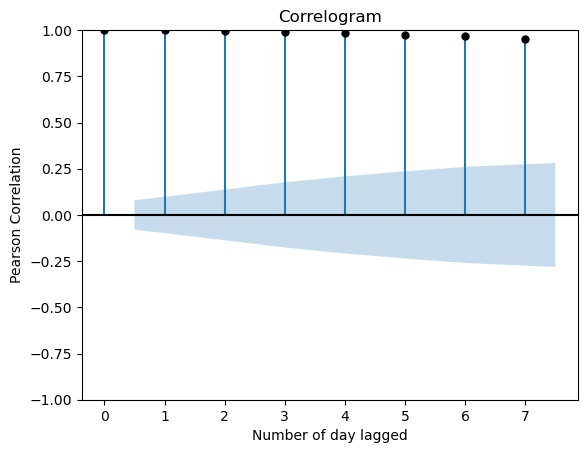

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import math
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import plot_acf

data = pd.read_csv("daily_covid_cases.csv")

# Question 1(a)

# creating the plot for the time series data
plt.plot(data ["new_cases"],color = "black")
plt.xlabel('Index of the day')
plt.ylabel('Number of Covid-19 cases')
plt.show()

# Question 1(b)

data ["One_Day_lag"] = data ["new_cases"].shift(1) # giving a time lag of 1 to the data
Correlation = data ["One_Day_lag"].corr(data ["new_cases"]) # obtaining the correlation between the original and time lag data
print(Correlation)

# Question 1(c)
# creating the x-y plot for original series and time lagged series

plt.scatter(data ["new_cases"],data ["One_Day_lag"],edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel("Given time sequence")
plt.ylabel("one day lagged time sequence")
plt.title("Scatter plot")
plt.show()
del data ["One_Day_lag"]

# Question 1(d)

time_lag = np.arange(7) # creating a list of various time lags
Correlation = [] # storing correlations

for i in range(len(time_lag)):
    data ["Day_lag"] = data ["new_cases"].shift(time_lag [i]) # creating new column in the database with time lagged data
    Correlation.append(data ["Day_lag"].corr(data ["new_cases"])) # finding correlation
del data ["Day_lag"]

plt.plot(time_lag,Correlation,color = "black")
plt.ylabel("Pearson Correlation")
plt.xlabel("Number of day lagged")
plt.title("Line Plot")
plt.show()

# Question 1(e)

plot_acf(data ["new_cases"],lags = len(time_lag),color = "black") # plotting correlation coefficient using inbuilt plot_acf function
plt.xlabel('Number of day lagged')
plt.ylabel('Pearson Correlation')
plt.title('Correlogram')
plt.show()

The coeffiecient of AR generated model
[ 5.99548333e+01  1.03675933e+00  2.61712336e-01  2.75612628e-02
 -1.75391955e-01 -1.52461366e-01]


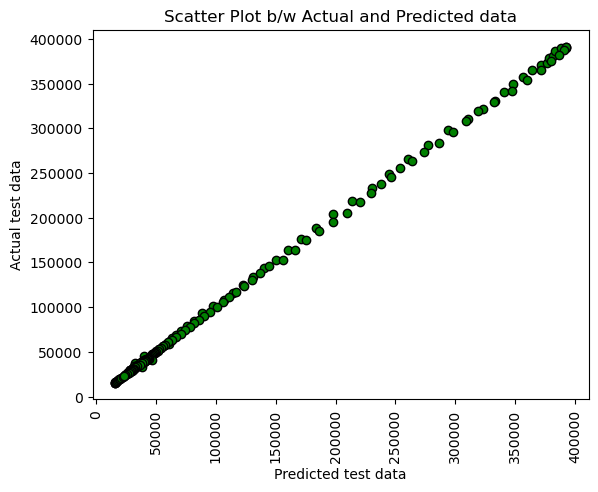

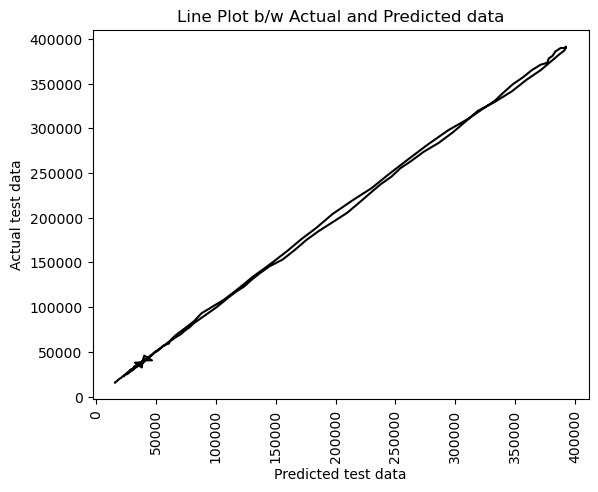

RMSE between actual and predicted test data is: [1.82476848]
MAPE between actual and predicted test data 0.015748363824058195


In [13]:
# Question 2(a) -- splitting the data and obtaining the parameters for autoregression

# using the code snippet given
data = pd.read_csv('daily_covid_cases.csv',parse_dates = ['Date'],index_col = ['Date'],sep = ',') 
test_size = 0.35
X = data.values
tst_sz = math.ceil(len(X)*test_size)
train,test = X [:len(X)-tst_sz],X [len(X)-tst_sz:]

# fitting the train data to the autoregression model to obtain the parameters for the same.
model_fit = AutoReg(train,lags = 5,old_names = False).fit()
coef = model_fit.params # this gets the parameters for the autoregression model in the form of w0 + w1tx-1 + w2tx-2 + w3tx-3...
print("The coeffiecient of AR generated model")
print(coef)

def AR(p):
    model_fit = AutoReg(train,lags = p,old_names = False).fit() # fit/train the model
    coef = model_fit.params # Get the coefficients of AR model


    # using these  coefficients  walk forward  over  time  steps  in test,  one step each time (this is a code snippet given in the pdf)
    hist = train [len(train)-p:]
    hist = [hist [i] for i in range(len(hist))]
    predictions = []

    for t in range(len(test)):
        length = len(hist)
        lag = [hist [i] for i in range(length-p,length)]
        ypred = coef [0]
        for d in range(p):
            ypred  +=  coef [d+1]*lag [p-d-1] # Add other values
        obs = test [t]
        predictions.append(ypred) # Append  predictions  to  compute  RMSE later
        hist.append(obs)  # Append actual test value to history, to be used in next step.

    rmserror = (mean_squared_error(test,predictions))**(0.5)*100/(sum(test)/len(test))
    mean_abs_err = mean_absolute_percentage_error(test,predictions)
    return [rmserror,mean_abs_err]

# Question 2(b) -- predicting the future data using autoregression and obtaining the RMSE and MAPE.

p = 5
hist = train [len(train)-p:]
hist = [hist [i] for i in range(len(hist))]
predictions = []


for t in range(len(test)):
    length = len(hist)
    lag = [hist [i] for i in range(length-p,length)]
    ypred = coef[0]
    for d in range(p):
        ypred  +=  coef [d+1]*lag [p-d-1]
    obs = test[t]
    predictions.append(ypred)
    hist.append(obs)

    
# Question 2(b)(i) -- scatterplot

plt.scatter(predictions,test,edgecolor = "black",color = 'green')
plt.xticks(rotation = 90)
plt.xlabel("Predicted test data")
plt.ylabel("Actual test data")
plt.title("Scatter Plot b/w Actual and Predicted data")
plt.show()

# Question 2(b)(ii) -- line plot

plt.plot(predictions,test,color = "black")
plt.xticks(rotation = 90)
plt.xlabel("Predicted test data")
plt.ylabel("Actual test data")
plt.title("Line Plot b/w Actual and Predicted data")
plt.show()

# Question 2(c)(iii) -- RMSE and MAPE

print("RMSE between actual and predicted test data is:",AR(5) [0])
mean_abs_err = mean_absolute_percentage_error(test,predictions)
print("MAPE between actual and predicted test data",AR(5) [1])

The RMSE error for time lag 1 days = 5.372948489180815 and the MAPE error = 0.03446540155208939
The RMSE error for time lag 5 days = 1.8247684769390298 and the MAPE error = 0.015748363824058195
The RMSE error for time lag 10 days = 1.6855319348811066 and the MAPE error = 0.015193699431086337
The RMSE error for time lag 15 days = 1.6119348114123357 and the MAPE error = 0.014962361178748204
The RMSE error for time lag 20 days = 1.8303392775770608 and the MAPE error = 0.016015135751548785
The RMSE error for time lag 25 days = 1.7033914119394813 and the MAPE error = 0.01535420771825644


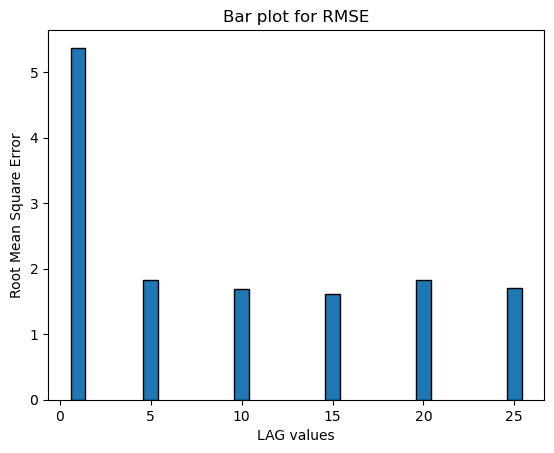

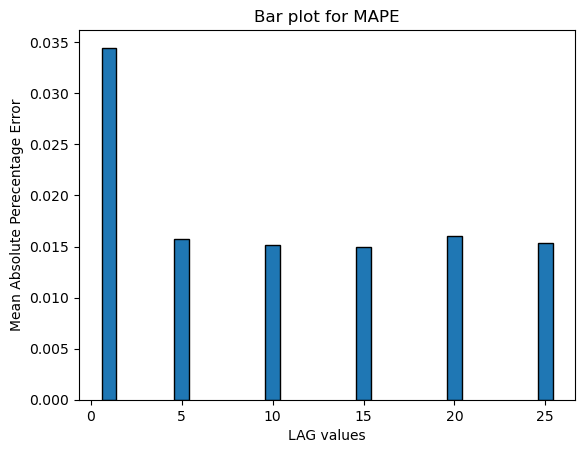

In [17]:
# Question 3


mean_abs_err = []
rmserror = []
time_lag = [1,5,10,15,20,25]

for i in time_lag:
    temp = AR(i)
    rmserror.append(temp[0][0])
    mean_abs_err.append(temp[1])

for i in range (len(time_lag)):
    print ("The RMSE error for time lag",time_lag[i],"days =",rmserror[i],"and the MAPE error =",mean_abs_err[i])


plt.bar(time_lag,rmserror,edgecolor = "black")
plt.xlabel("LAG values")
plt.ylabel("Root Mean Square Error")
plt.title("Bar plot for RMSE")
plt.show()


plt.bar(time_lag,mean_abs_err,edgecolor = "black")
plt.ylabel("Mean Absolute Perecentage Error")
plt.xlabel("LAG values")
plt.title("Bar plot for MAPE")
plt.show()

In [18]:
# Question 4

i=0
while (True):
    data ["Day_lag"] = data ["new_cases"].shift(i)
    corr = data ["Day_lag"].corr(data ["new_cases"])
    if(abs(corr)<2/(len(train)**0.5)):
        heurestic = i-1
        break
    i+=1
print(f'The heurestic value for time lag is {heurestic}')
T = AR(heurestic)
print("The RMSE for heurestic value as time lag is",T [0])
print("The MAPE for heurestic value as time lag is",T [1])

The heurestic value for time lag is 47
The RMSE for heurestic value as time lag is [1.70831664]
The MAPE for heurestic value as time lag is 0.016371556982298405


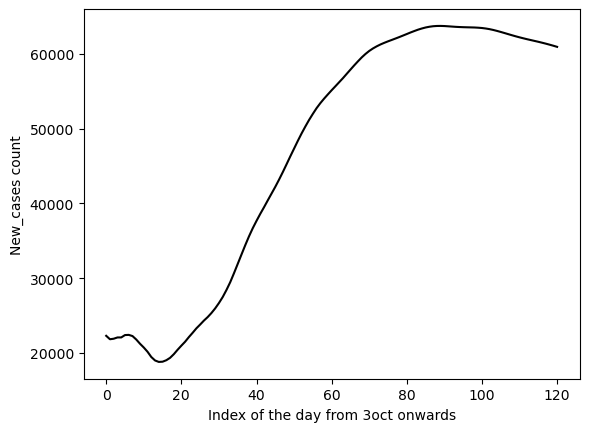

In [19]:
# Extra work

model_fit = AutoReg(X,lags = heurestic,old_names = False).fit()
coef = model_fit.params
hist = X [len(X)-heurestic:]
hist = [hist [i] for i in range(len(hist))]
predictions = []


for t in range(121):
    length = len(hist)
    lag = [hist [i] for i in range(length-heurestic,length)]
    ypred = coef [0]
    for d in range(heurestic):
        ypred  +=  coef [d+1]*lag [heurestic-d-1]
    predictions.append(ypred)
    hist.append(predictions[-1])

    
plt.plot(predictions,color = "black")
plt.xlabel("Index of the day from 3oct onwards")
plt.ylabel("New_cases count")
plt.show()